建立数据集

In [3]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [4]:
x=torch.randn(2,3)
torch.cat((x,x),0)

tensor([[ 0.0028,  0.3519, -0.8283],
        [ 0.2613, -1.2984,  1.3715],
        [ 0.0028,  0.3519, -0.8283],
        [ 0.2613, -1.2984,  1.3715]])

In [5]:
torch.cat((x,x),)

tensor([[ 0.0028,  0.3519, -0.8283],
        [ 0.2613, -1.2984,  1.3715],
        [ 0.0028,  0.3519, -0.8283],
        [ 0.2613, -1.2984,  1.3715]])

In [6]:
torch.cat((x,x),1)

tensor([[ 0.0028,  0.3519, -0.8283,  0.0028,  0.3519, -0.8283],
        [ 0.2613, -1.2984,  1.3715,  0.2613, -1.2984,  1.3715]])

In [7]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      #  第一块区域中 所有点的坐标值
y0 = torch.zeros(100)               #  第一块区域所有点都标记为0
x1 = torch.normal(-2*n_data, 1)     # 第二块区域中，所有点的坐标值
y1 = torch.ones(100)                #  第二块区域
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # cat例如上
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # 
x,y=Variable(x),Variable(y)

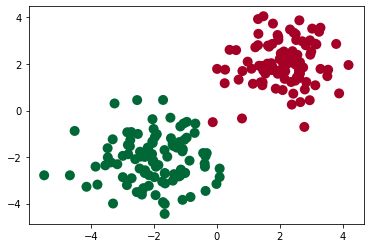

In [9]:
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=y.data.numpy(),s=100,lw=0,cmap='RdYlGn')
plt.show()

In [18]:
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x

    
net=Net(2,10,2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


<ipython-input-19-4ea0f2229e10>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = torch.max(F.softmax(out), 1)[1]


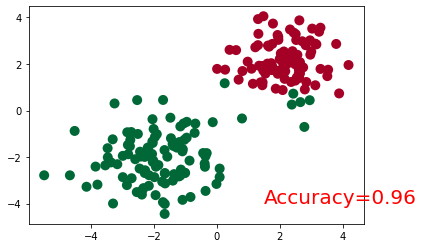

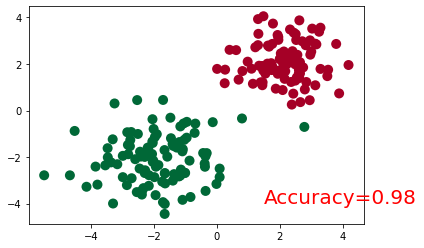

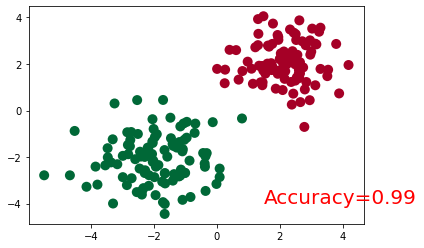

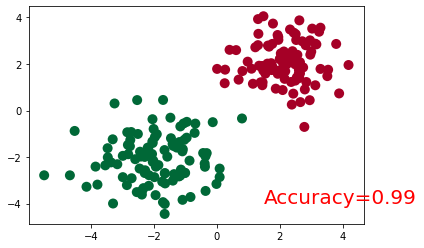

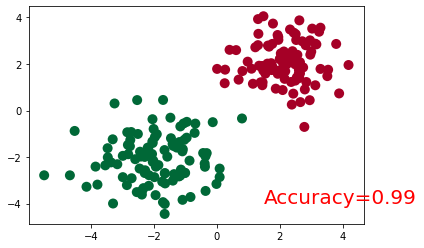

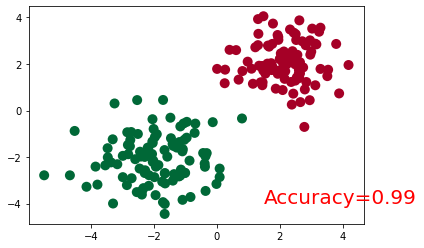

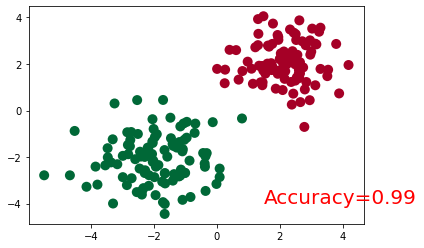

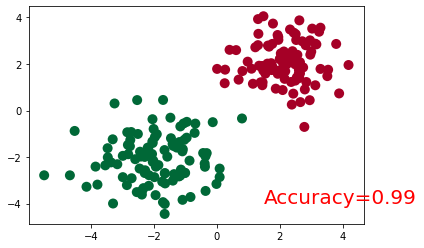

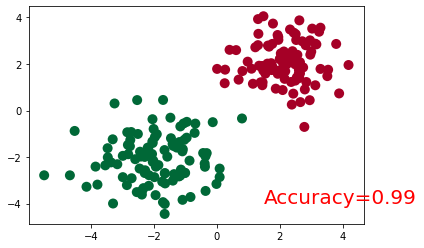

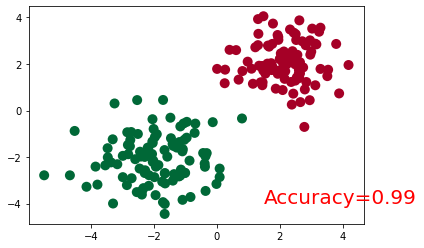

In [19]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.02)
loss_func=torch.nn.CrossEntropyLoss()

for t in range(100):
    out=net(x)
    
    loss=loss_func(out,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()